In [1]:
#predict humidity at 3 pm

# *problem statement:
    create a model that will help me predict relative humidity at 3 pm

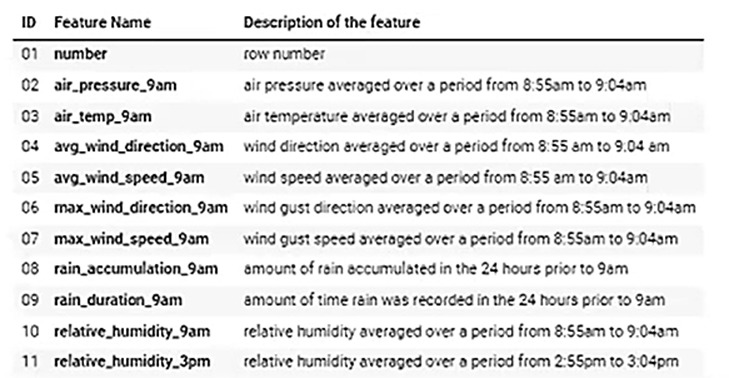

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data=pd.read_csv("daily_weather.csv")
data.head()

number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0       0        918.060000     74.822000              271.100000   
1       1        917.347688     71.403843              101.935179   
2       2        923.040000     60.638000               51.000000   
3       3        920.502751     70.138895              198.832133   
4       4        921.160000     44.294000              277.800000   

   avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0            2.080354              295.400000            2.863283   
1            2.443009              140.471548            3.533324   
2           17.067852               63.700000           22.100967   
3            4.337363              211.203341            5.190045   
4            1.856660              136.500000            2.863283   

   rain_accumulation_9am  rain_duration_9am  relative_humidity_9am  \
0                    0.0                0.0              42.420000   
1                    0.0                0.0              24.328697   
2                    0.0               20.0               8.900000   
3                    0.0                0.0              12.189102   
4                    8.9            14730.0              92.410000   

   relative_humidity_3pm  
0              36.160000  
1              19.426597  
2              14.460000  
3              12.742547  
4              76.740000

In [4]:
data.shape
# rows= 1095 col= 11

(1095, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [6]:
# find missing value
data.isna().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [7]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [8]:
# data.fillna({"air_pressure_9am":data["air_pressure_9am"].median(),
#              "air_temp_9am":data["air_temp_9am"].median(),
#               "avg_wind_direction_9am":data["avg_wind_direction_9am"].median(),
#               "avg_wind_speed_9am":data["avg_wind_speed_9am"].median(),
#               "max_wind_direction_9am":data["max_wind_direction_9am"].median(), 
#               "max_wind_speed_9am":data["max_wind_speed_9am"].median(),
#               "rain_accumulation_9am":data["rain_accumulation_9am"].median(),
#               "rain_duration_9am":data["rain_duration_9am"].median()},inplace=True)

In [9]:
data.isna().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [10]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [11]:
col_missing_value=['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am']

In [12]:
for col in col_missing_value:
    md=data[col].median()
    print(f"median value in {md} of column is {col}")
    data.fillna({col:md},inplace=True)

median value in 918.9210452583593 of column is air_pressure_9am
median value in 65.7154790488537 of column is air_temp_9am
median value in 166.0 of column is avg_wind_direction_9am
median value in 3.8713333518840805 of column is avg_wind_speed_9am
median value in 177.29999999999993 of column is max_wind_direction_9am
median value in 4.943637399999937 of column is max_wind_speed_9am
median value in 0.0 of column is rain_accumulation_9am
median value in 0.0 of column is rain_duration_9am


In [13]:
data.isna().sum()

number                    0
air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [14]:
x=data.drop(["number","relative_humidity_3pm"],axis=1)
x.head()

air_pressure_9am  air_temp_9am  avg_wind_direction_9am  avg_wind_speed_9am  \
0        918.060000     74.822000              271.100000            2.080354   
1        917.347688     71.403843              101.935179            2.443009   
2        923.040000     60.638000               51.000000           17.067852   
3        920.502751     70.138895              198.832133            4.337363   
4        921.160000     44.294000              277.800000            1.856660   

   max_wind_direction_9am  max_wind_speed_9am  rain_accumulation_9am  \
0              295.400000            2.863283                    0.0   
1              140.471548            3.533324                    0.0   
2               63.700000           22.100967                    0.0   
3              211.203341            5.190045                    0.0   
4              136.500000            2.863283                    8.9   

   rain_duration_9am  relative_humidity_9am  
0                0.0              42.420000  
1                0.0              24.328697  
2               20.0               8.900000  
3                0.0              12.189102  
4            14730.0              92.410000

In [15]:
y=data["relative_humidity_3pm"]
y

0       36.160000
1       19.426597
2       14.460000
3       12.742547
4       76.740000
          ...    
1090    38.180000
1091    73.340000
1092    52.310000
1093    58.280000
1094    15.100000
Name: relative_humidity_3pm, Length: 1095, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3243287,shuffle=True)
print(f"x_train {x_train.shape}")
print(f"x_test {x_test.shape}")
print(f"x_train {x_train.shape}")
print(f"x_test {x_test.shape}")


x_train (876, 9)
x_test (219, 9)
x_train (876, 9)
x_test (219, 9)


In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dtr=DecisionTreeRegressor()
#train model
dtr.fit(x_train,y_train)
# eveluate model
y_pred=dtr.predict(x_test)
y_pred

array([39.21      , 18.76      , 55.52      , 48.3       , 28.43      ,
        7.30218051, 37.01      , 16.47641162, 19.9765781 , 22.84121232,
       13.17715066, 55.52      , 16.47641162, 45.82      , 18.40222328,
       17.3185992 , 23.68297841, 38.36      , 27.21      , 14.4952428 ,
       15.67297888, 16.47641162, 55.15      , 61.12      , 21.79370897,
       35.7       , 21.77      , 22.05724342, 44.82      , 56.45      ,
       19.59      , 51.1       , 41.85      , 52.1       , 15.52      ,
       15.32410468, 70.32      , 65.04      , 51.96      , 18.18336406,
       17.25880526, 22.93      , 39.39      , 13.35131297, 51.65      ,
       91.68      , 50.38      , 65.04      , 24.27      , 43.92      ,
       47.16      , 25.14      , 22.18990678, 87.29      , 15.52      ,
       27.99      , 24.03      , 14.96107362, 12.15540564, 68.26      ,
       16.9971455 , 11.4117152 , 16.03      ,  8.03      , 91.7       ,
       89.4       , 16.32780669, 10.96656163, 13.35131297, 22.26

In [20]:
from sklearn. metrics import mean_squared_error
from math import sqrt

In [21]:
rmse=sqrt(mean_squared_error(y_test,y_pred))
rmse

11.346393129745497

In [22]:
from sklearn.metrics import r2_score
r_square=r2_score(y_test,y_pred)
r_square

0.7210381637128045

In [23]:
from sklearn.tree import export_graphviz # create tree , visulize tree
import pydotplus
from IPython.display import Image # display tre
# Generate a pydot file
dot_tree = export_graphviz(decision_tree=dtr,
                          filled=True,
                          rounded=True,
                          special_characters=True,
                          )
#Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)
#Display the graph
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.532243 to fit

(process:5644): GLib-GIO-WARNING **: 11:04:06.936: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.214.400_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 4 extensions but has no verbs

(process:5644): GLib-GIO-WARNING **: 11:04:07.030: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2405.32.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:5644): GLib-GIO-WARNING **: 11:04:07.092: Unexpectedly, UWP app `Clipchamp.Clipchamp_3.1.10920.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



In [24]:
# with hyper parameters

In [25]:
dtr_hyper=DecisionTreeRegressor(min_samples_split=100,max_depth=5)
# train model
dtr_hyper.fit(x_train,y_train)
# evalute model
y_pred_with_hyper_parameter=dtr_hyper.predict(x_test)
print(y_pred)
rmse=sqrt(mean_squared_error(y_test,y_pred_with_hyper_parameter))
print(y_pred)
r_square=r2_score(y_test,y_pred)
print("R Square",r_square)

[39.21       18.76       55.52       48.3        28.43        7.30218051
 37.01       16.47641162 19.9765781  22.84121232 13.17715066 55.52
 16.47641162 45.82       18.40222328 17.3185992  23.68297841 38.36
 27.21       14.4952428  15.67297888 16.47641162 55.15       61.12
 21.79370897 35.7        21.77       22.05724342 44.82       56.45
 19.59       51.1        41.85       52.1        15.52       15.32410468
 70.32       65.04       51.96       18.18336406 17.25880526 22.93
 39.39       13.35131297 51.65       91.68       50.38       65.04
 24.27       43.92       47.16       25.14       22.18990678 87.29
 15.52       27.99       24.03       14.96107362 12.15540564 68.26
 16.9971455  11.4117152  16.03        8.03       91.7        89.4
 16.32780669 10.96656163 13.35131297 22.26632503 40.97       39.57
 28.43       56.93       16.03       28.51       39.21       21.69
 41.85       90.21       66.63       39.96       56.22       76.72
  7.18736098 40.99       63.2         9.98407134 46

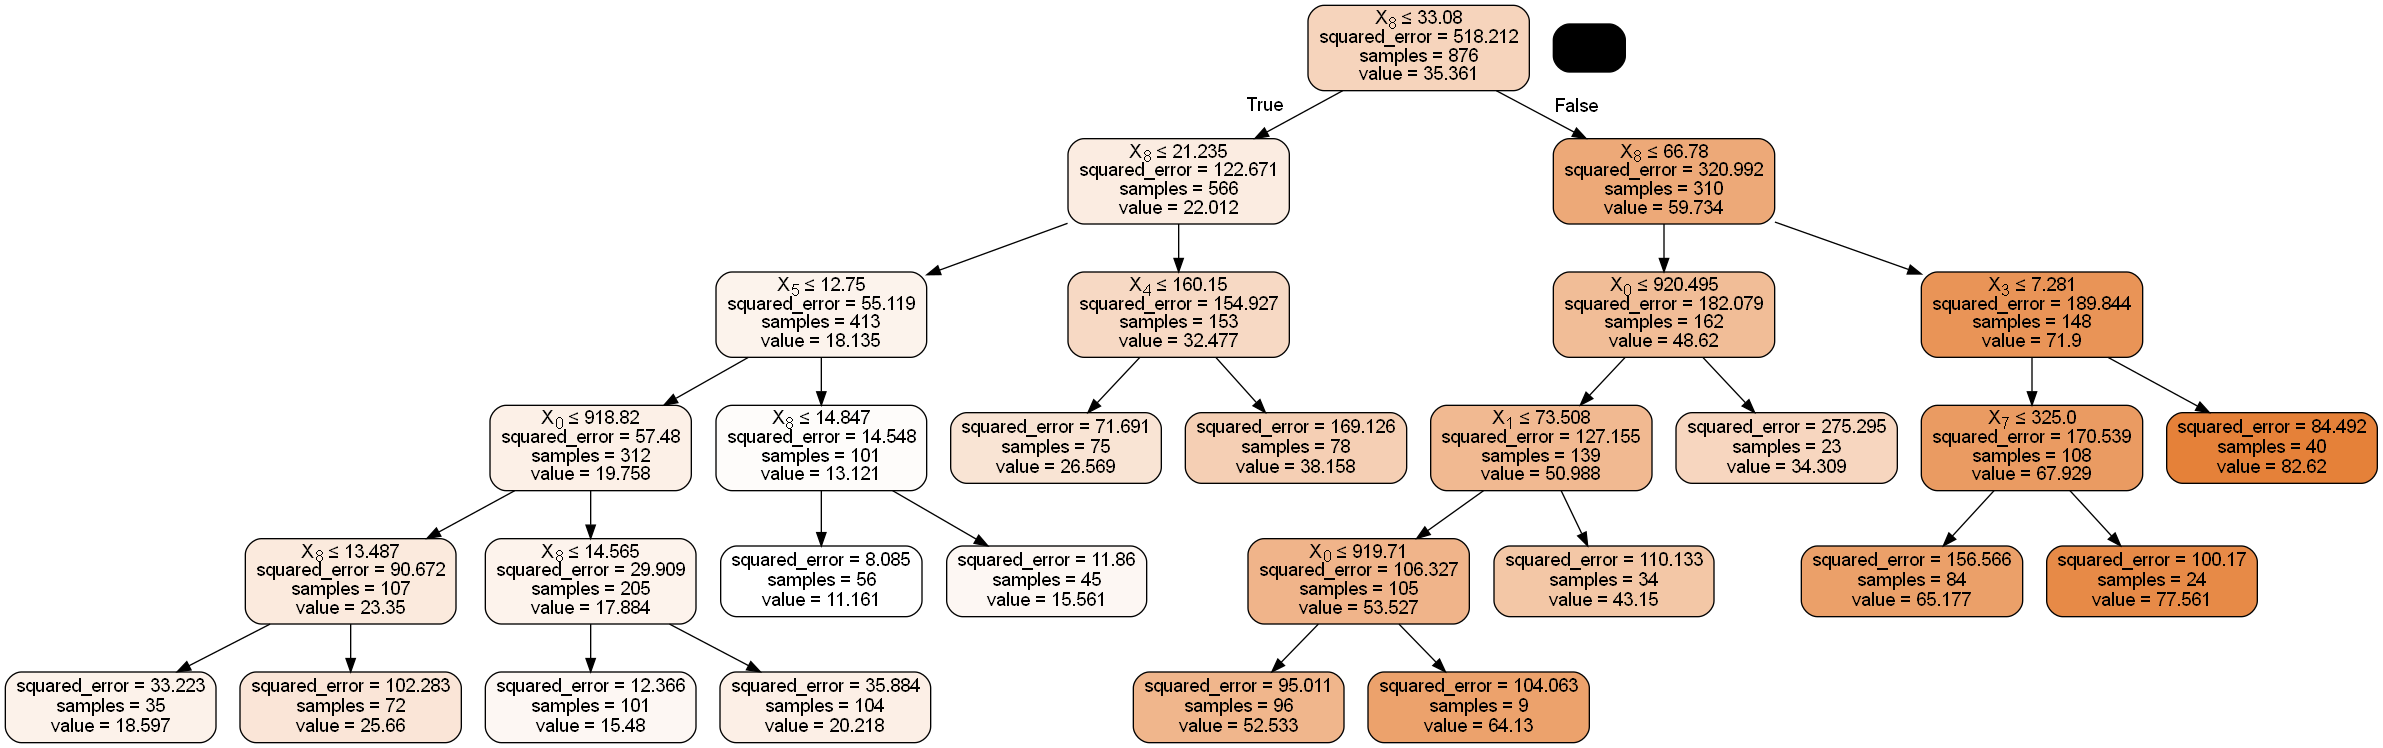

In [26]:
from sklearn.tree import export_graphviz # create tree , visulize tree
import pydotplus
from IPython.display import Image # display tre
# Generate a pydot file
dot_tree = export_graphviz(decision_tree=dtr_hyper,
                          filled=True,
                          rounded=True,
                          special_characters=True,
                          )
#Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)
#Display the graph
Image(graph.create_png())

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1095 non-null   float64
 2   air_temp_9am            1095 non-null   float64
 3   avg_wind_direction_9am  1095 non-null   float64
 4   avg_wind_speed_9am      1095 non-null   float64
 5   max_wind_direction_9am  1095 non-null   float64
 6   max_wind_speed_9am      1095 non-null   float64
 7   rain_accumulation_9am   1095 non-null   float64
 8   rain_duration_9am       1095 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [42]:
import pickle
pickle.dump(dtr_hyper,open("decission_tree_model.pkl","wb"))

In [43]:
data["classify"]=data["relative_humidity_3pm"]>=data["relative_humidity_3pm"].median()

In [29]:
data

number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0          0        918.060000     74.822000              271.100000   
1          1        917.347688     71.403843              101.935179   
2          2        923.040000     60.638000               51.000000   
3          3        920.502751     70.138895              198.832133   
4          4        921.160000     44.294000              277.800000   
...      ...               ...           ...                     ...   
1090    1090        918.900000     63.104000              192.900000   
1091    1091        918.710000     49.568000              241.600000   
1092    1092        916.600000     71.096000              189.300000   
1093    1093        912.600000     58.406000              172.700000   
1094    1094        921.530000     77.702000               97.100000   

      avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0               2.080354              295.400000            2.863283   
1               2.443009              140.471548            3.533324   
2              17.067852               63.700000           22.100967   
3               4.337363              211.203341            5.190045   
4               1.856660              136.500000            2.863283   
...                  ...                     ...                 ...   
1090            3.869906              207.300000            5.212070   
1091            1.811921              227.400000            2.371156   
1092            3.064608              200.800000            3.892276   
1093            3.825167              189.100000            4.764682   
1094            3.265932              125.900000            4.451511   

      rain_accumulation_9am  rain_duration_9am  relative_humidity_9am  \
0                       0.0                0.0              42.420000   
1                       0.0                0.0              24.328697   
2                       0.0               20.0               8.900000   
3                       0.0                0.0              12.189102   
4                       8.9            14730.0              92.410000   
...                     ...                ...                    ...   
1090                    0.0                0.0              26.020000   
1091                    0.0                0.0              90.350000   
1092                    0.0                0.0              45.590000   
1093                    0.0                0.0              64.840000   
1094                    0.0                0.0              14.560000   

      relative_humidity_3pm  classify  
0                 36.160000      True  
1                 19.426597     False  
2                 14.460000     False  
3                 12.742547     False  
4                 76.740000      True  
...                     ...       ...  
1090              38.180000      True  
1091              73.340000      True  
1092              52.310000      True  
1093              58.280000      True  
1094              15.100000     False  

[1095 rows x 12 columns]

In [30]:
data.dtypes

number                      int64
air_pressure_9am          float64
air_temp_9am              float64
avg_wind_direction_9am    float64
avg_wind_speed_9am        float64
max_wind_direction_9am    float64
max_wind_speed_9am        float64
rain_accumulation_9am     float64
rain_duration_9am         float64
relative_humidity_9am     float64
relative_humidity_3pm     float64
classify                     bool
dtype: object

In [31]:
data["classify"].astype("int64")

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: classify, Length: 1095, dtype: int64

In [32]:
y_v1=data["classify"]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y_v1,test_size=0.2,random_state=3243287,shuffle=True)
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"x_test {x_train.shape}")
print(f"y_test {y_test.shape}")

x_train (876, 9)
y_train (876,)
x_test (876, 9)
y_test (219,)


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_dtc_pred=dtc.predict(x_test)
print(y_dtc_pred)

[ True False  True  True  True False  True  True  True False False  True
  True False False False False  True  True False False False  True  True
  True  True False False  True  True False  True  True  True False False
  True  True  True False False False  True False  True  True  True  True
  True  True  True False False  True False  True  True False False  True
 False  True False False  True  True False False False  True  True  True
  True  True False False  True False  True  True  True  True  True  True
 False  True  True False  True False  True False  True  True False False
  True False  True  True  True  True False  True False False False False
 False False  True False  True  True False  True False  True  True  True
  True  True  True  True False  True False  True False False False  True
 False False False  True  True  True False False  True False  True False
 False  True  True False False False  True False False False False False
  True False  True False  True  True False False Fa

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,y_dtc_pred))

              precision    recall  f1-score   support

       False       0.89      0.86      0.87       105
        True       0.87      0.90      0.89       114

    accuracy                           0.88       219
   macro avg       0.88      0.88      0.88       219
weighted avg       0.88      0.88      0.88       219

